In [1]:
INPUT_FILE = '../data/processed/enriched_df.csv'
POPULATION_FILE = '../data/raw/total_pop_1960_2018.csv'
META_DATA = '../data/raw/meta_data.csv'

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
cf.go_offline()

#%matplotlib inline

In [62]:
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
%load_ext autoreload
%autoreload 2

## Read in data

In [3]:
df = pd.read_csv(INPUT_FILE)
# df_population = pd.read_csv(POPULATION_FILE, skiprows=4)

In [4]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


## Plot some graphs

In [5]:
df_suicides = df.groupby(['year', 'sex', 'country']).sum().reset_index()

In [6]:
df_suicides.head()

,year,sex,country,suicides_no,population
0,1979,female,Argentina,508.0,12532000.0
1,1979,female,Australia,479.0,6641600.0
2,1979,female,Austria,0.0,3742700.0
3,1979,female,Bahamas,0.0,95800.0
4,1979,female,Barbados,0.0,119800.0


In [7]:
df_suicides['per_100000'] = df_suicides['suicides_no'] / df_suicides['population'] * 100000

In [8]:
df_suicides

,year,sex,country,suicides_no,population,per_100000
0,1979,female,Argentina,508.0,1.253200e+07,4.053623
1,1979,female,Australia,479.0,6.641600e+06,7.212118
2,1979,female,Austria,0.0,3.742700e+06,0.000000
3,1979,female,Bahamas,0.0,9.580000e+04,0.000000
4,1979,female,Barbados,0.0,1.198000e+05,0.000000
...,...,...,...,...,...,...
7291,2016,male,Sweden,784.0,4.620777e+06,16.966843
7292,2016,male,Tajikistan,154.0,4.269218e+06,3.607218
7293,2016,male,Thailand,3283.0,3.000200e+07,10.942602
7294,2016,male,United Kingdom,0.0,3.031980e+07,0.000000


### Make some plots

In [21]:
df_bla = df_suicides[df_suicides["country"] == "France"].reset_index()

In [65]:
list(df_suicides["country"])

['Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Barbados',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Costa Rica',
 'Cuba',
 'Denmark',
 'Dominica',
 'Ecuador',
 'Falkland Islands (Malvinas)',
 'Finland',
 'France',
 'French Guiana',
 'Greece',
 'Guatemala',
 'Guyana',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Panama',
 'Paraguay',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Romania',
 'Saint Lucia',
 'Singapore',
 'Spain',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'United Kingdom',
 'United States of America',
 'Uruguay',
 'Venezuela (Bolivarian Republic of)',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Barbados',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Costa Rica',
 'Cuba',
 'Denmark',
 'Dominica',
 'Ecuador',
 'Falkland Islands (Ma

In [77]:
def plot_stats(data_frame):
    
    countries = ["France", "Belgium", "Norway", "Netherlands", "Spain"]
    
    
    # df = data_frame[data_frame["country"] == country].reset_index()
    df = data_frame[data_frame["country"].isin(countries)].reset_index()

    df["per_100000"] = df["per_100000"].replace(0, np.nan)
    
    
    if len(df) == 0:
        print(f"Country {country} not present in dataframe, returning nothing")
        return 
    
    plt.figure(figsize=(20,8))
    
#     sns.lineplot(x="year", y="suicides_no", hue="sex",
#              style="sex", data=df, markers=True, color="k")
    
#     ax2 = plt.twinx()
    
    sns.lineplot(x="year", y="per_100000", style="sex", hue="country", data=df, color="r", markers=True)
    plt.ylabel("suicides per 100,000", fontsize=20)
    plt.xlabel("year", fontsize=20)
    


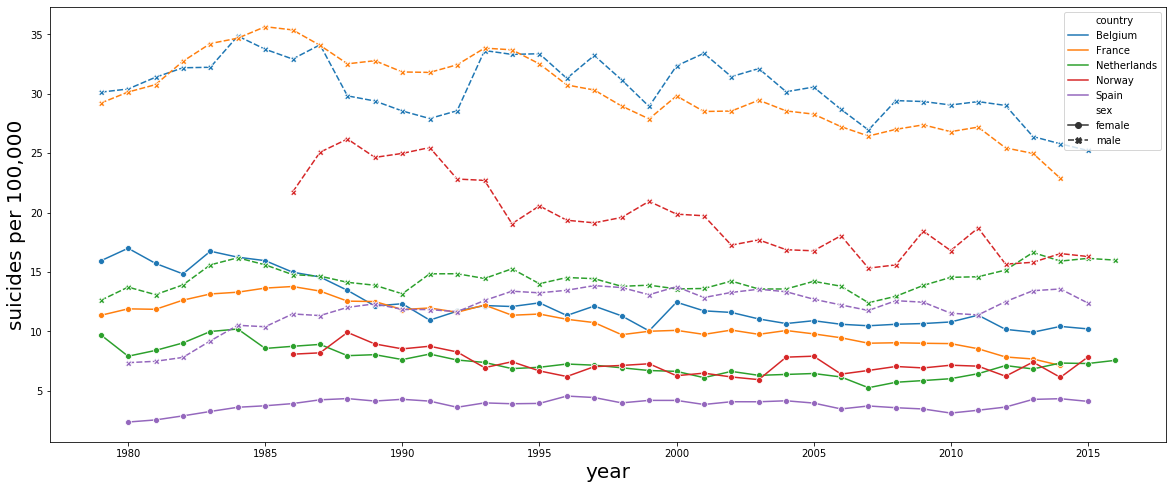

In [78]:
plot_stats(df_suicides)

## TODO: 
* Look at top highest suicides per 100,000 and top lowest, show those in plots
* also show the one with biggest difference in male and female suicides
* show plot with map of world, countries coloured in (can use plotly I guess) by how many suicides per 100,000 and can have widget for which year -- would be awesome plot. 
* this would be amazing https://community.plot.ly/t/trouble-with-converting-offline-animation-to-online/19129/2 (choropleth timeseries)

In [82]:
def plot_stats(data_frame):
    
    countries = ["Japan", "Greece", "Singapore"]
    
    
    # df = data_frame[data_frame["country"] == country].reset_index()
    df = data_frame[data_frame["country"].isin(countries)].reset_index()

    df["per_100000"] = df["per_100000"].replace(0, np.nan)
    
    
    if len(df) == 0:
        print(f"Country {country} not present in dataframe, returning nothing")
        return 
    
    plt.figure(figsize=(20,8))
    
#     sns.lineplot(x="year", y="suicides_no", hue="sex",
#              style="sex", data=df, markers=True, color="k")
    
#     ax2 = plt.twinx()
    
    sns.lineplot(x="year", y="per_100000", style="sex", hue="country", data=df, color="r", markers=True)
    plt.ylabel("suicides per 100,000", fontsize=20)
    plt.xlabel("year", fontsize=20)
    

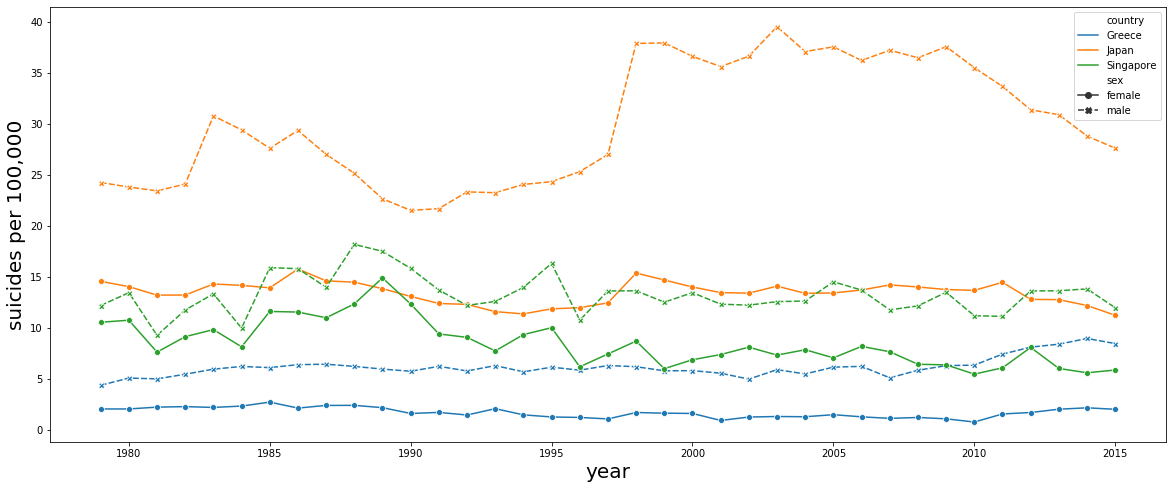

In [83]:
plot_stats(df_suicides)

(array([15., 18.,  3.,  0.,  0.,  0.,  1.,  7., 17., 11.]),
 array([2220. , 2887.8, 3555.6, 4223.4, 4891.2, 5559. , 6226.8, 6894.6,
        7562.4, 8230.2, 8898. ]),
 <a list of 10 Patch objects>)

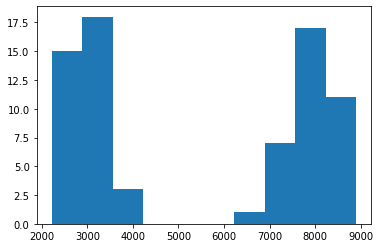

In [80]:
plt.hist((df_suicides.loc[df_suicides['country'] == 'France'])["suicides_no"])

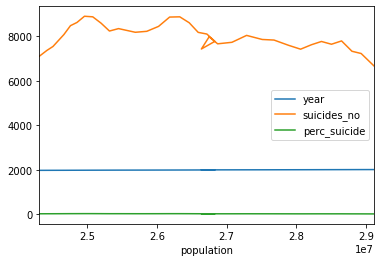

In [34]:
#@interact
#def plot_suicides_over_years(country=widgets.Dropdown(options=df.country.value_counts().index.sort_values())):


sub = (df_suicides.loc[df_suicides['country'] == 'France'])#.reset_index()
males = sub.loc[sub['sex'] == 'male']
females = sub.loc[sub['sex'] == 'female']
sub.index = sub['year']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


males.plot('population')
#ax.plot(males['population'])
#ax.plot(females['population'])





#both = sub.pivot(columns='sex', values=['suicides_no', 'population'], index='year').reset_index()
#print(sub.head())
#suicide_num = sub.pivot(columns='sex', values=['suicides_no', 'population', 'perc_suicide'], index='year')
#population = sub.pivot(columns='sex', values=['population'], index='year')
#suicide_num.iplot(suicide_num[['suicides_no', 'population']], secondary_y = ['perc_suicide'])
#print(both.head())
#both.iplot(kind='line', secondary_y = ['male'])
#population.iplot(kind='line')

#fig.update_layout(yaxis_type="log")

In [21]:
import plotly

In [78]:
df_suicides.columns

Index(['suicides_no', 'population'], dtype='object')

In [52]:
test = pd.DataFrame(df_suicides) #.head()

In [53]:
test.head()

,year,sex,country,suicides_no
0,1979,female,Argentina,508.0
1,1979,female,Australia,479.0
2,1979,female,Austria,0.0
3,1979,female,Bahamas,0.0
4,1979,female,Barbados,0.0


In [77]:
df[df['country'] == 'Austria'].groupby(['year', 'sex']).sum()

suicides_no  population
year sex                            
1979 female          0.0   3742700.0
     male            0.0   3321500.0
1980 female        590.0   3743200.0
     male         1342.0   3328600.0
1981 female        595.0   3776400.0
...                  ...         ...
2014 male          990.0   3969038.0
2015 female        290.0   4201798.0
     male          961.0   4017588.0
2016 female        297.0   4241056.0
     male          907.0   4078155.0

[76 rows x 2 columns]

In [68]:
test2 = df[df['country'] == 'France'].groupby(['year', 'sex']).sum().reset_index()

In [70]:
test2.head()

,year,sex,suicides_no,population
0,1979,female,2891.0,25492100.0
1,1979,male,7102.0,24313200.0
2,1980,female,3044.0,25605100.0
3,1980,male,7362.0,24421100.0
4,1981,female,3045.0,25697100.0


In [74]:
test2.pivot(columns='sex', values=['suicides_no', 'population'], index='year').head()

suicides_no          population            
sex       female    male      female        male
year                                            
1979      2891.0  7102.0  25492100.0  24313200.0
1980      3044.0  7362.0  25605100.0  24421100.0
1981      3045.0  7541.0  25697100.0  24509100.0
1982      3287.0  8074.0  26045800.0  24664900.0
1983      3439.0  8475.0  26168200.0  24759700.0

In [66]:
@interact
def plot_suicides_over_years(country=widgets.Dropdown(options=['France', 'Argentina'])):
    sub = test.loc[test['country'] == country]
    
    sub = sub.pivot(columns='sex', values='suicides_no', index='year')
    print(sub.head())
    sub.iplot(kind='line')

interactive(children=(Dropdown(description='country', options=('France', 'Argentina'), value='France'), Output…

In [50]:
df_suicides = test.pivot(columns=['sex', 'country'], values='suicides_no')
df_suicides.head()

KeyError: "None of [Index(['sex', 'country'], dtype='object')] are in the [columns]"

In [32]:
df_suicides.iplot(kind='bar')